<a href="https://colab.research.google.com/github/AmandaAntonio/Analise_de_dados_Airbnb_Boston/blob/main/Analisando_os_Dados_do_Airbnb_%7C_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





 # <center> Boston:  O berço da independêcia americana</center>

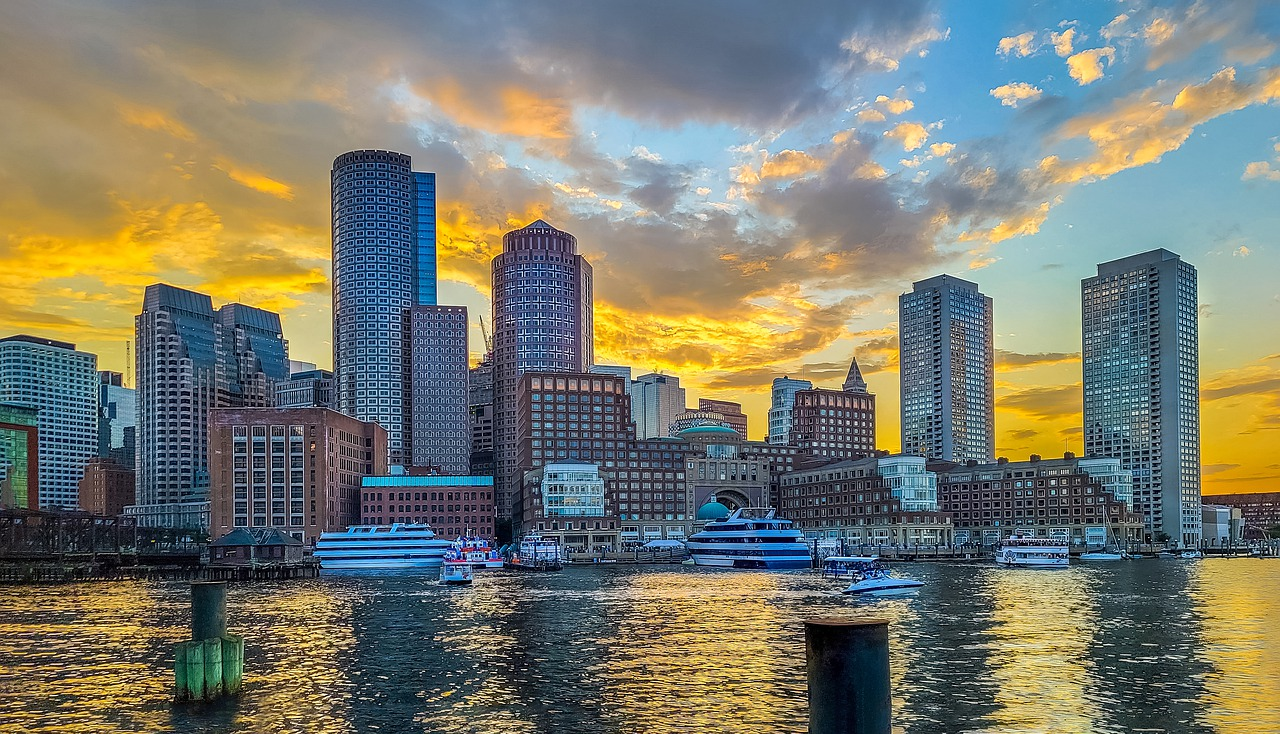

Fundada em 1630 por colonizadores ingleses, está localizada na região nordeste estadunidense denominada [Nova Inglaterra](https://pt.wikipedia.org/wiki/Nova_Inglaterra) (em ingles: New England), Boston é a capital e a cidade mais populosa do estado de Massachussetts.

Com aproximadamente 700.000 habitantes, possui uma comunidade brasileira expressiva e atrai pessoas do mundo todo sendo uma cidade global com um extenso centro financeiro, comercial, industrial e universitário.

**Nesta análise, foi analisado os dados referentes à cidade Boston, para ver quais insights podem ser extraídos a partir de dados brutos.**


## Obtenção dos Dados
Uma das iniciativas do Airbnb é disponibilizar dados do site, nesta análise os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e foi baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Boston (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/listings.csv')

## Análise dos Dados
O objetivo desta etapa é criamos uma consciência situacional inicial dos dados e entender com eles estão estruturados.

**Dicionário das variáveis**

* id - número de identificação do imóvel
* name - nome no anúncio da propriedade 
* host_id - número de identificação do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião
* neighbourhood_group - não apresentar nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - tipo do quarto oferecido
* price - preço para alugar o imóvel
* minimum_nights - minimo de noite para alugar o imóvel
* number_of_reviews - número de avaliações que imóvel possui
* last_review - data da última avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listings_count - quantidade imóveis do mesmo anfitrião
* availability_365 - número de dias disponiveis dentro de 365 dias
* number_of_reviews_ltm - número de avaliações no último ano
* license - tipo de licenciamento comercial do imóvel


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,21,2021-07-25,0.27,1,17,4,NaN
1,5506,** Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,99,3,110,2021-10-25,0.71,10,75,3,Approved by the government
2,6695,Home Away from Home! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.77,10,127,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,80,91,25,2020-04-15,0.28,6,244,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,95,91,32,2020-04-16,0.21,6,314,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que estamos utilizando é versão 'resumida' dos atributos tabelados sobre Boston no Airbnb, porém no mesmo portal é possivel encontrar a versão completa dos dados.

In [ ]:
# identificar o volume de dados do DataFrame
print ('Entradas:\t {}'. format(df.shape[0]))
print ('Váriaveis :\t {}'. format(df.shape[1]))

# verificar as variáveis do dataset
display(df.dtypes)

Entradas:	 3349
Váriaveis :	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.447895
reviews_per_month                 0.298298
last_review                       0.298298
host_name                         0.097044
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [ ]:
# verificar valores dupliacados
df.duplicated().value_counts()

False    3349
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

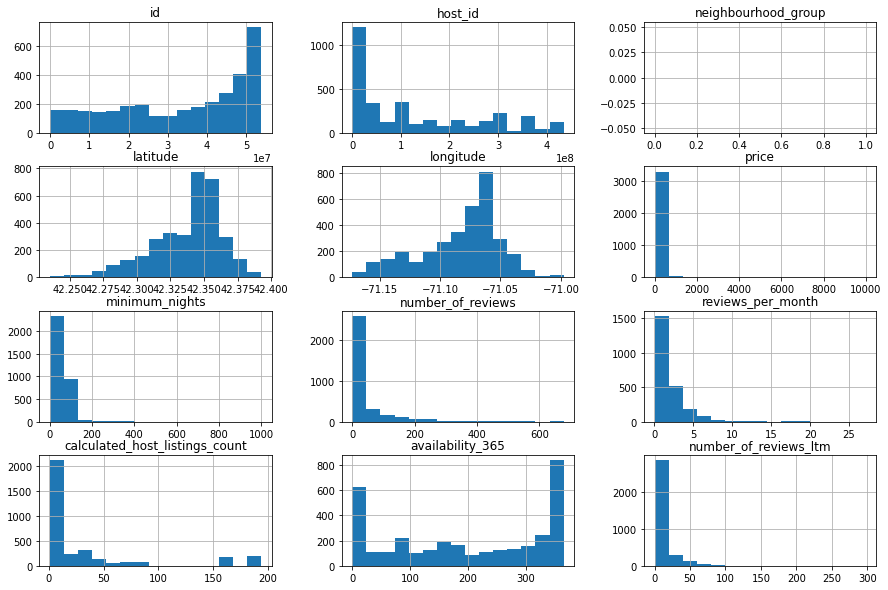

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
 Pela distribuição dos dados do dataframe através do histograma é possivel perceber indícios da presença de outliers.
As colunas price, minimum_nights e calculated_host_listings_count por exemplo, apresentam desvio da distribuição dos valores evidenciando distorção gráfica.

---
Para ver mais detalhadamente será utilizado o metódo ***describe()*** e o gráfico Boxplot para auxiliar na persecpção de outliers e das distorções presentes.

#### Método ***describe( )***

In [ ]:
# resumo estátistico das variáveis númericas
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3349.000000,3349.000000,3349.000000,2350.000000,3349.000000,3349.000000,3349.000000
mean,168.231114,39.084801,38.313228,1.701140,32.065990,197.484921,8.187220
std,262.049196,46.164722,75.073720,2.068519,55.398099,137.290064,18.424485
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,75.000000,2.000000,0.000000,0.260000,1.000000,70.000000,0.000000
50%,126.000000,29.000000,6.000000,1.000000,6.000000,200.000000,0.000000
75%,200.000000,91.000000,40.000000,2.467500,31.000000,341.000000,7.000000
max,10000.000000,1000.000000,678.000000,27.170000,194.000000,365.000000,298.000000


Olhando o resumo estático acima é possível afirmar que:

1.   75% dos preços estão abaixo de 200 dolares.
2.   A quantidade máxima de noites ultapassam 365 dias (1 ano) e 75% estão abaixo de 91 dias mínimos para locação.
3.  50% dos anfitriões tem menos de 6 imóveis.

#### Boxplot para a coluna Price

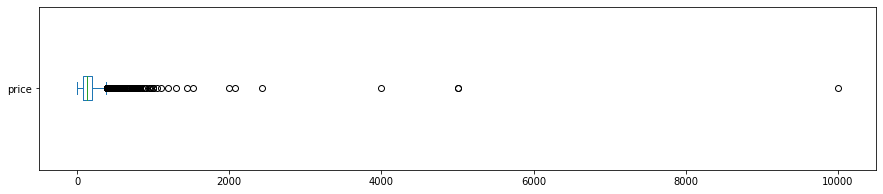

price: valores acima de 350 dolares
201 entradas
6.00%


In [ ]:
# Gráfico Boxplot coluna price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 350 dolares para price
print('price: valores acima de 350 dolares')
print("{} entradas".format(len(df[df.price > 350])))
print("{:.2f}%".format((len(df[df.price > 350]) / df.shape[0])*100))

#### Boxplot para coluna Minimum Nights

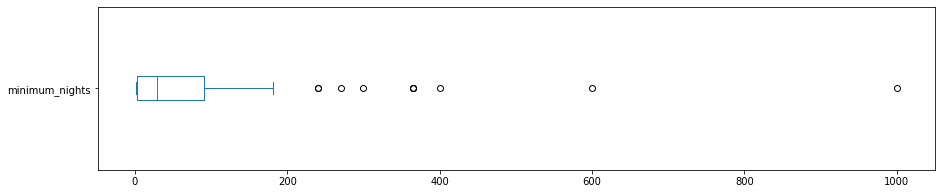

minimum_nights: valores acima de 100 noites
64 entradas
1.91%


In [ ]:
# Gráfico Boxplot coluna minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 100 dias para minimum_nights
print('minimum_nights: valores acima de 100 noites')
print("{} entradas".format(len(df[df.minimum_nights > 100])))
print("{:.2f}%".format((len(df[df.minimum_nights > 100]) / df.shape[0])*100))

Já a quantidade mínima de noites para locação, aproximadamente  98% dos anfitrião esperam que locatário fique por pelo menos 100 dias em hospedagem.

#### Boxplot para coluna Calculated Host Listings Count

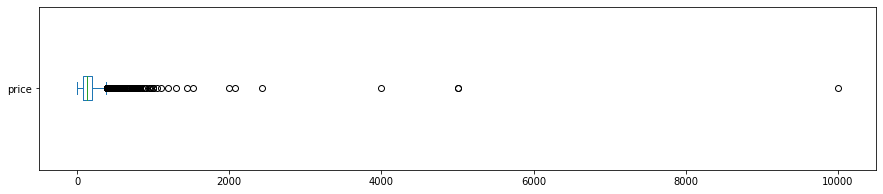

calculated_host_listings_count: valores acima de 60 imóveis
509 entradas
15.20%


In [ ]:
# Gráfico Boxplot coluna calculated_host_listings_count
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de anfitriões com mais de 60 imóveis
print('calculated_host_listings_count: valores acima de 60 imóveis')
print("{} entradas".format(len(df[df.calculated_host_listings_count > 60])))
print("{:.2f}%".format((len(df[df.calculated_host_listings_count > 60]) / df.shape[0])*100))

Mesmo dobrando o valor das entradas, considerando o percentil 75% em listagem de imóveis feitas pelo mesmo anfitrião (coluna calculated_host_listings_count) apresentado pelo **describe( )**, possuimos 509 entradas (15%) com mais de 60 imóveis listados no Airbnb.

-----


#### Outiliers | Valores Ausentes
Com foi identificado os *outliers* e tendo o intuito de preservar o dataframe as correções serão feitas a partir das variáveis **price**  e  **minimum_nights**  utilizando os valores do gráfico Boxplot.

Já as colunas **neighbourhood_group, license, last_review e host_name** seram excluidas completamente pois não serão utilizadas e apresentam grande quantidade de valores ausentes.


#### Histogramas 
 Limpar o *DataFrame* dos outliers e das colunas que não serão usadas e plotar novamente o histograma.
 

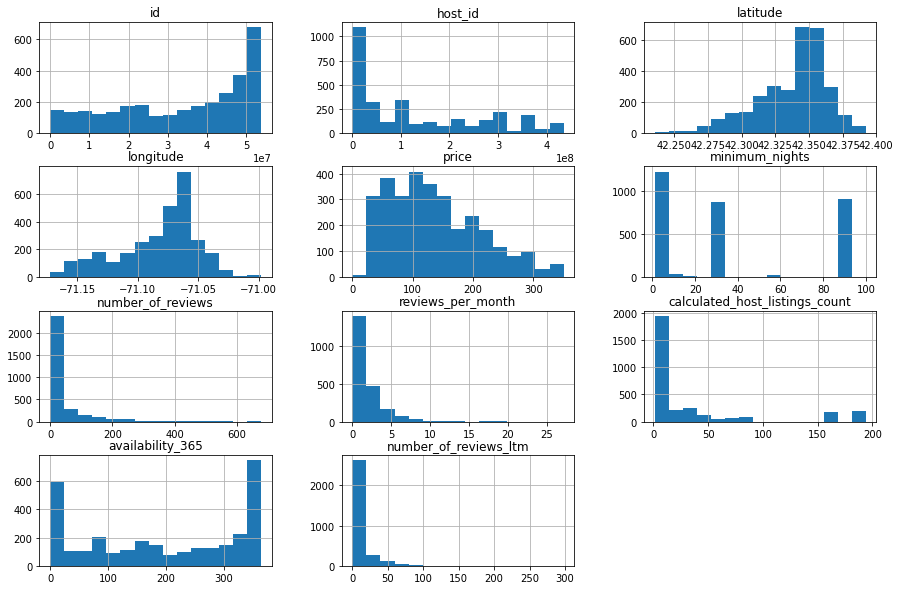

In [ ]:
# remover os *outliers* em um novo DataFrame
df2 = df.copy()
df2.drop(df2[df2.price > 350 ].index, axis=0, inplace=True)
df2.drop(df2[df2.minimum_nights > 100].index, axis=0, inplace=True)

# remover colunas que não serão utilizadas
df2.drop('neighbourhood_group', axis=1, inplace=True)
df2.drop('license', axis=1, inplace=True)
df2.drop('last_review', axis=1, inplace=True)
df2.drop('host_name', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df2.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas, basicamente estamos buscando elo ou afinidade entre duas variáveis e pelo coeficiente de correlação estabelecer qual a intensidade. 

Para identificar as correlações existentes entre as variáveis de interesse, vou:

1. Criar uma matriz de correlação
2. Gerar um *heatmap* a partir dessa matriz.

In [ ]:
# criar uma matriz de correlação
corr = df2[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.081638,-0.040772,0.036952,0.032465,0.089709
minimum_nights,-0.081638,1.000000,-0.291031,-0.422125,0.232196,0.085137
number_of_reviews,-0.040772,-0.291031,1.000000,0.554310,-0.218606,-0.062125
reviews_per_month,0.036952,-0.422125,0.554310,1.000000,-0.012691,0.063629
calculated_host_listings_count,0.032465,0.232196,-0.218606,-0.012691,1.000000,0.345120
availability_365,0.089709,0.085137,-0.062125,0.063629,0.345120,1.000000


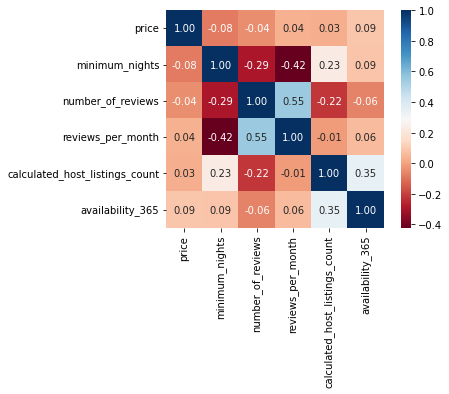

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual a média dos preços de aluguel?**

Conferir se ocorreu mudanças de preço das locações, valor inicial era 168.23 dólares

In [ ]:
# ver a média da coluna price
price_mean = df.price.mean()
print (' A média de preço da coluna price é {:.2f} dólares'.format(price_mean))

 A média de preço da coluna price é 168.23 dólares


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna room_type específica o tipo da locação anunciada. Se você conhece o Airbnb sabe que existem alternativas de acomodação e aqui vamos identifica - las.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df2.room_type.value_counts()

Entire home/apt    1902
Private room       1152
Hotel room           23
Shared room          10
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df2.room_type.value_counts()/df2.shape[0]

Entire home/apt    0.616132
Private room       0.373178
Hotel room         0.007451
Shared room        0.003239
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

No caso, será comparados os bairros (neighbourhoods) a partir do preço de locação.



***Antes vamos conhecer os bairros da cidade de Boston***

No mapa é mostrado a separação oficial em 23 bairros, pois alguns deles por serem grandes possuem áreas menores, chamadas ***subdistritos*** que somados totalizam 84 sub-áreas.

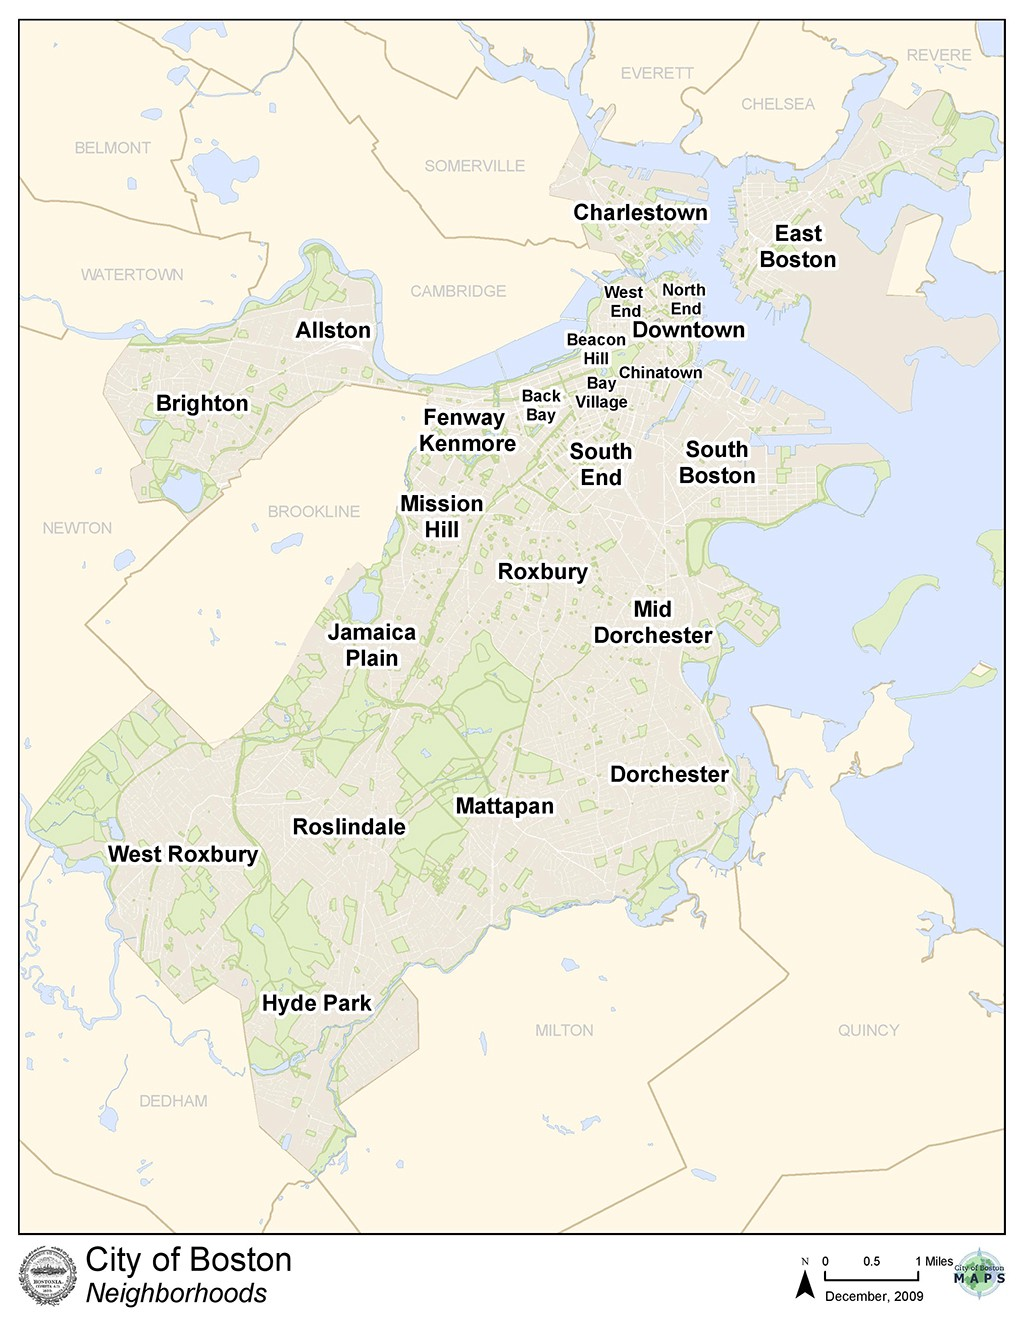




Boston como na maioria das cidades pelo mundo, tem em sua região central os maiores preços da cidade. Essa área por apresentar grande diversidade cultural, atrações artísticas, parques, estádios, teatro, museu, cinema e especialmente parte da hitória dos Estados Unidos geram forte apelo social/comercial sendo responsável pelo alto custo.

---

***Curiosidades***

Caso tem interrese em saber um pouco sobre cada bairro, 2 brasileiros que moram em Boston a Luciane e o Otávio fizeram em seu blog Roteiros e Relatos um guia da cidade por bairro, para dar um conferida clique [aqui](https://medium.com/@roteiroserelatos/guia-de-boston-bairro-a-bairro-d7eec5381497).


Já a empresa Mass Bayer Movers publicou um texto em seu site, onde é apontado os bairros mais ricos de Boston e informações como preço média das casas e renda média familiar do bairro. Veja [aqui]('https://massbaymovers.com/blog/richest-neighborhoods-in-boston/').

In [ ]:
# ver preços por bairros, na média
df2.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Chinatown                  206.914286
South Boston Waterfront    204.442308
Leather District           184.333333
Charlestown                184.250000
Back Bay                   183.613260
West End                   182.111111
Downtown                   171.374570
Fenway                     170.491379
South End                  165.058333
North End                  155.488372
Name: price, dtype: float64

Acima, vemos que bairros como Chinatown, South Boston, Charleston estão com média de preço superior a região central (Downtown) o que gera estranhamento.

Só para dar um único exemplo de como uma amostra pode estar enviesada, veja quantas entradas há para Chinatown.

In [ ]:
# mostrar a quantidade de imóveis em Chinatown
print(df2[df2.neighbourhood == 'Chinatown'].shape)

# visualizar as entradas
df2[df2.neighbourhood == 'Chinatown']

(35, 14)


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
283,6746543,Cool Top Floor 1 Bedroom Penthouse,32376332,Chinatown,42.34991,-71.06164,Entire home/apt,207,91,7,0.09,1,246,0
496,12067685,Central sunny apt. (fun rugs),3981669,Chinatown,42.34942,-71.06341,Entire home/apt,135,91,7,0.10,1,0,0
745,17559493,"NEW 2nd Floor, 2BR Downtown Boston",118122992,Chinatown,42.34903,-71.06200,Entire home/apt,300,3,174,3.01,4,146,12
746,17559756,"NEW 3rd Floor, 2BR Downtown Boston",118122992,Chinatown,42.35030,-71.06037,Entire home/apt,300,3,141,2.44,4,145,8
747,17559846,NEW B 1BR Downtown Boston,118122992,Chinatown,42.34835,-71.06039,Entire home/apt,125,29,209,3.61,4,349,1
749,17573922,"NEW 1st Floor, 1BR Downtown Boston",118122992,Chinatown,42.34986,-71.06197,Entire home/apt,160,29,144,2.49,4,243,2
902,20588785,The Moontower Apartment,88360952,Chinatown,42.35236,-71.05979,Private room,50,91,62,1.18,2,0,0
1037,23287239,Downtown Boston | Stylish Studio | Full Kitchen,30283594,Chinatown,42.35148,-71.06196,Entire home/apt,174,91,23,0.71,27,359,12
1038,23288548,Specials! | Downtown Studio by GLS | Steps fr...,30283594,Chinatown,42.35146,-71.06130,Entire home/apt,189,91,1,0.05,27,359,0
1039,23289378,Modern Studio | Downtown Boston | Steps from T,30283594,Chinatown,42.35110,-71.06152,Entire home/apt,174,91,23,0.78,27,359,16


In [ ]:
# mostrar a quantidade de imóveis em Downtown
print(df2[df2.neighbourhood == "Downtown"].shape)

# visualizar as entradas
df2[df2.neighbourhood == 'Downtown']

(291, 14)


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4,10730,Bright 1bed facing Golden Dome,26988,Downtown,42.359060,-71.062710,Entire home/apt,95,91,32,0.21,6,314,0
16,67774,Corner 1 bed facing Golden Dome,26988,Downtown,42.356890,-71.062060,Entire home/apt,85,91,47,0.42,6,273,3
57,820073,"Modern Loft, 1700 SqFt. Location!",1911807,Downtown,42.355800,-71.061040,Entire home/apt,230,6,78,0.74,2,0,0
64,973695,Perfect Central Location Sleeps 1-4,1760577,Downtown,42.358880,-71.060320,Entire home/apt,257,91,60,0.60,1,365,0
68,1055627,Spacious 1 bdrm in Beacon Hill,4299002,Downtown,42.361940,-71.062560,Entire home/apt,160,91,8,0.08,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,53775571,"Awaiting for your Next Stay, Book now 403!",183914990,Downtown,42.355970,-71.061130,Entire home/apt,83,2,0,NaN,12,360,0
3326,53775865,404 Monthly Discounts See you,183914990,Downtown,42.353971,-71.062839,Entire home/apt,102,2,0,NaN,12,353,0
3328,53785663,Big Saving Affordable Stay in Boston. Close to...,183914990,Downtown,42.353977,-71.062978,Entire home/apt,101,2,0,NaN,12,359,0
3329,53787160,Come Visit Boston and Stay in our Homey Studio...,183914990,Downtown,42.355490,-71.061200,Entire home/apt,92,3,0,NaN,12,355,0


Ao analisar cada bairro separadamente e possível notar que Chinatown apresenta uma amostra pequena e não-representativa, em relação a Downtown.

----

Visto que o Dataframe apresenta coordenadas de latitude e longitude, é possível plotar cada ponto e ver a distribução dos imóveis ao longo de Boston.

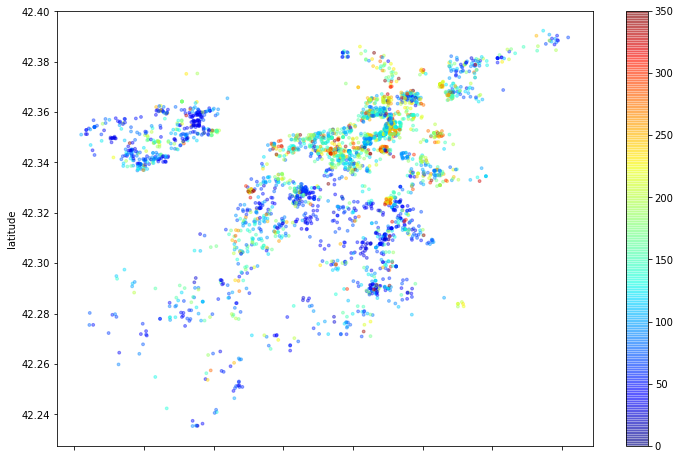

In [ ]:
# plotar os imóveis pela latitude-longitude
df2.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Conferir se ocorreu mudanças com média inicial de 39 noites.


In [ ]:
# ver a média da coluna minimum_nights
min_nights_mean = df2.minimum_nights.mean()
print('A média mínima de noites é de {:.1f} diárias'.format(min_nights_mean))

A média mínima de noites é de 36.8 diárias


## Conclusões


Boston foi cenário de movimentos politícos mais significativos da história do país e hoje é uma das melhores cidades para se viver nos Estados Unidos .

Com simples análise, nota-se brevemente características das acomadações da cidade, a título de exemplo, a média mínima de noites com 36 diárias e média de preço 168.00 dólares. Já o tipo de imóvel disponivel temos casas/apartamentos inteiros liderando com 61% e quartos privados com 37% de listagens.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos e constou-se que existem outliers em algumas das variáveis.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com mais atributos disponíveis.

